In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load CSV file into a DataFrame
# Replace 'your_file.csv' with the actual path to your CSV file
df = pd.read_csv('C:/Users/dyros/Desktop/dummy_ws/data/init.csv')

# Display the first few rows of the DataFrame
df = df.dropna().reset_index(drop=True)

df = df.iloc[:,-12:-1]
dup_mask = df.duplicated(keep=False)
df = df[~dup_mask]
df

field.angles0  field.angles1  field.angles2  field.angles3  \
0        -11.082769       2.770157       4.283059      14.548878   
1        -11.098074       2.770170       4.283287      14.548651   
2        -11.105703       2.822173       4.283379      14.548592   
3        -11.109491       2.848267       4.283438      14.548632   
4        -11.111414       2.861301       4.283473      14.548644   
...             ...            ...            ...            ...   
1328      -2.799154       6.068973       1.925037      12.457160   
1329      -2.378025       6.120552       1.937592      12.474802   
1330      -2.190835       6.373095       2.355110      12.601110   
1331      -2.079076       6.443326       1.892368      12.563686   
1332      -2.038415       6.478148       1.660138      12.544324   

      field.angles4  field.angles5  field.angles6  field.angles7  \
0        -41.601200     -33.672256     -29.284393     -25.591557   
1        -41.601170     -33.669914     -29.284395     -25.588924   
2        -41.601173     -33.669910     -29.284391     -25.552589   
3        -41.600971     -33.669910     -29.284397     -25.512283   
4        -41.601158     -33.669907     -29.284391     -25.512280   
...             ...            ...            ...            ...   
1328     -43.123154     -41.701298     -38.120052     -39.008141   
1329     -43.369331     -42.304276     -37.668301     -38.809959   
1330     -42.646873     -43.306568     -37.371452     -38.612411   
1331     -42.559883     -43.993343     -37.251770     -38.610771   
1332     -42.562859     -43.993008     -37.250294     -38.573956   

      field.angles8  field.angles9  field.angles10  
0          0.310821      -0.415646        0.093483  
1          0.310336      -0.415795        0.093792  
2          0.309861      -0.415966        0.093867  
3          0.309449      -0.415657        0.093930  
4          0.309256      -0.415580        0.093968  
...             ...            ...             ...  
1328       0.272768      -0.296830        0.070495  
1329       0.272142      -0.296875        0.071956  
1330       0.272989      -0.296897        0.073224  
1331       0.274133      -0.296947        0.074343  
1332       0.275421      -0.297448        0.074495  

[1333 rows x 11 columns]

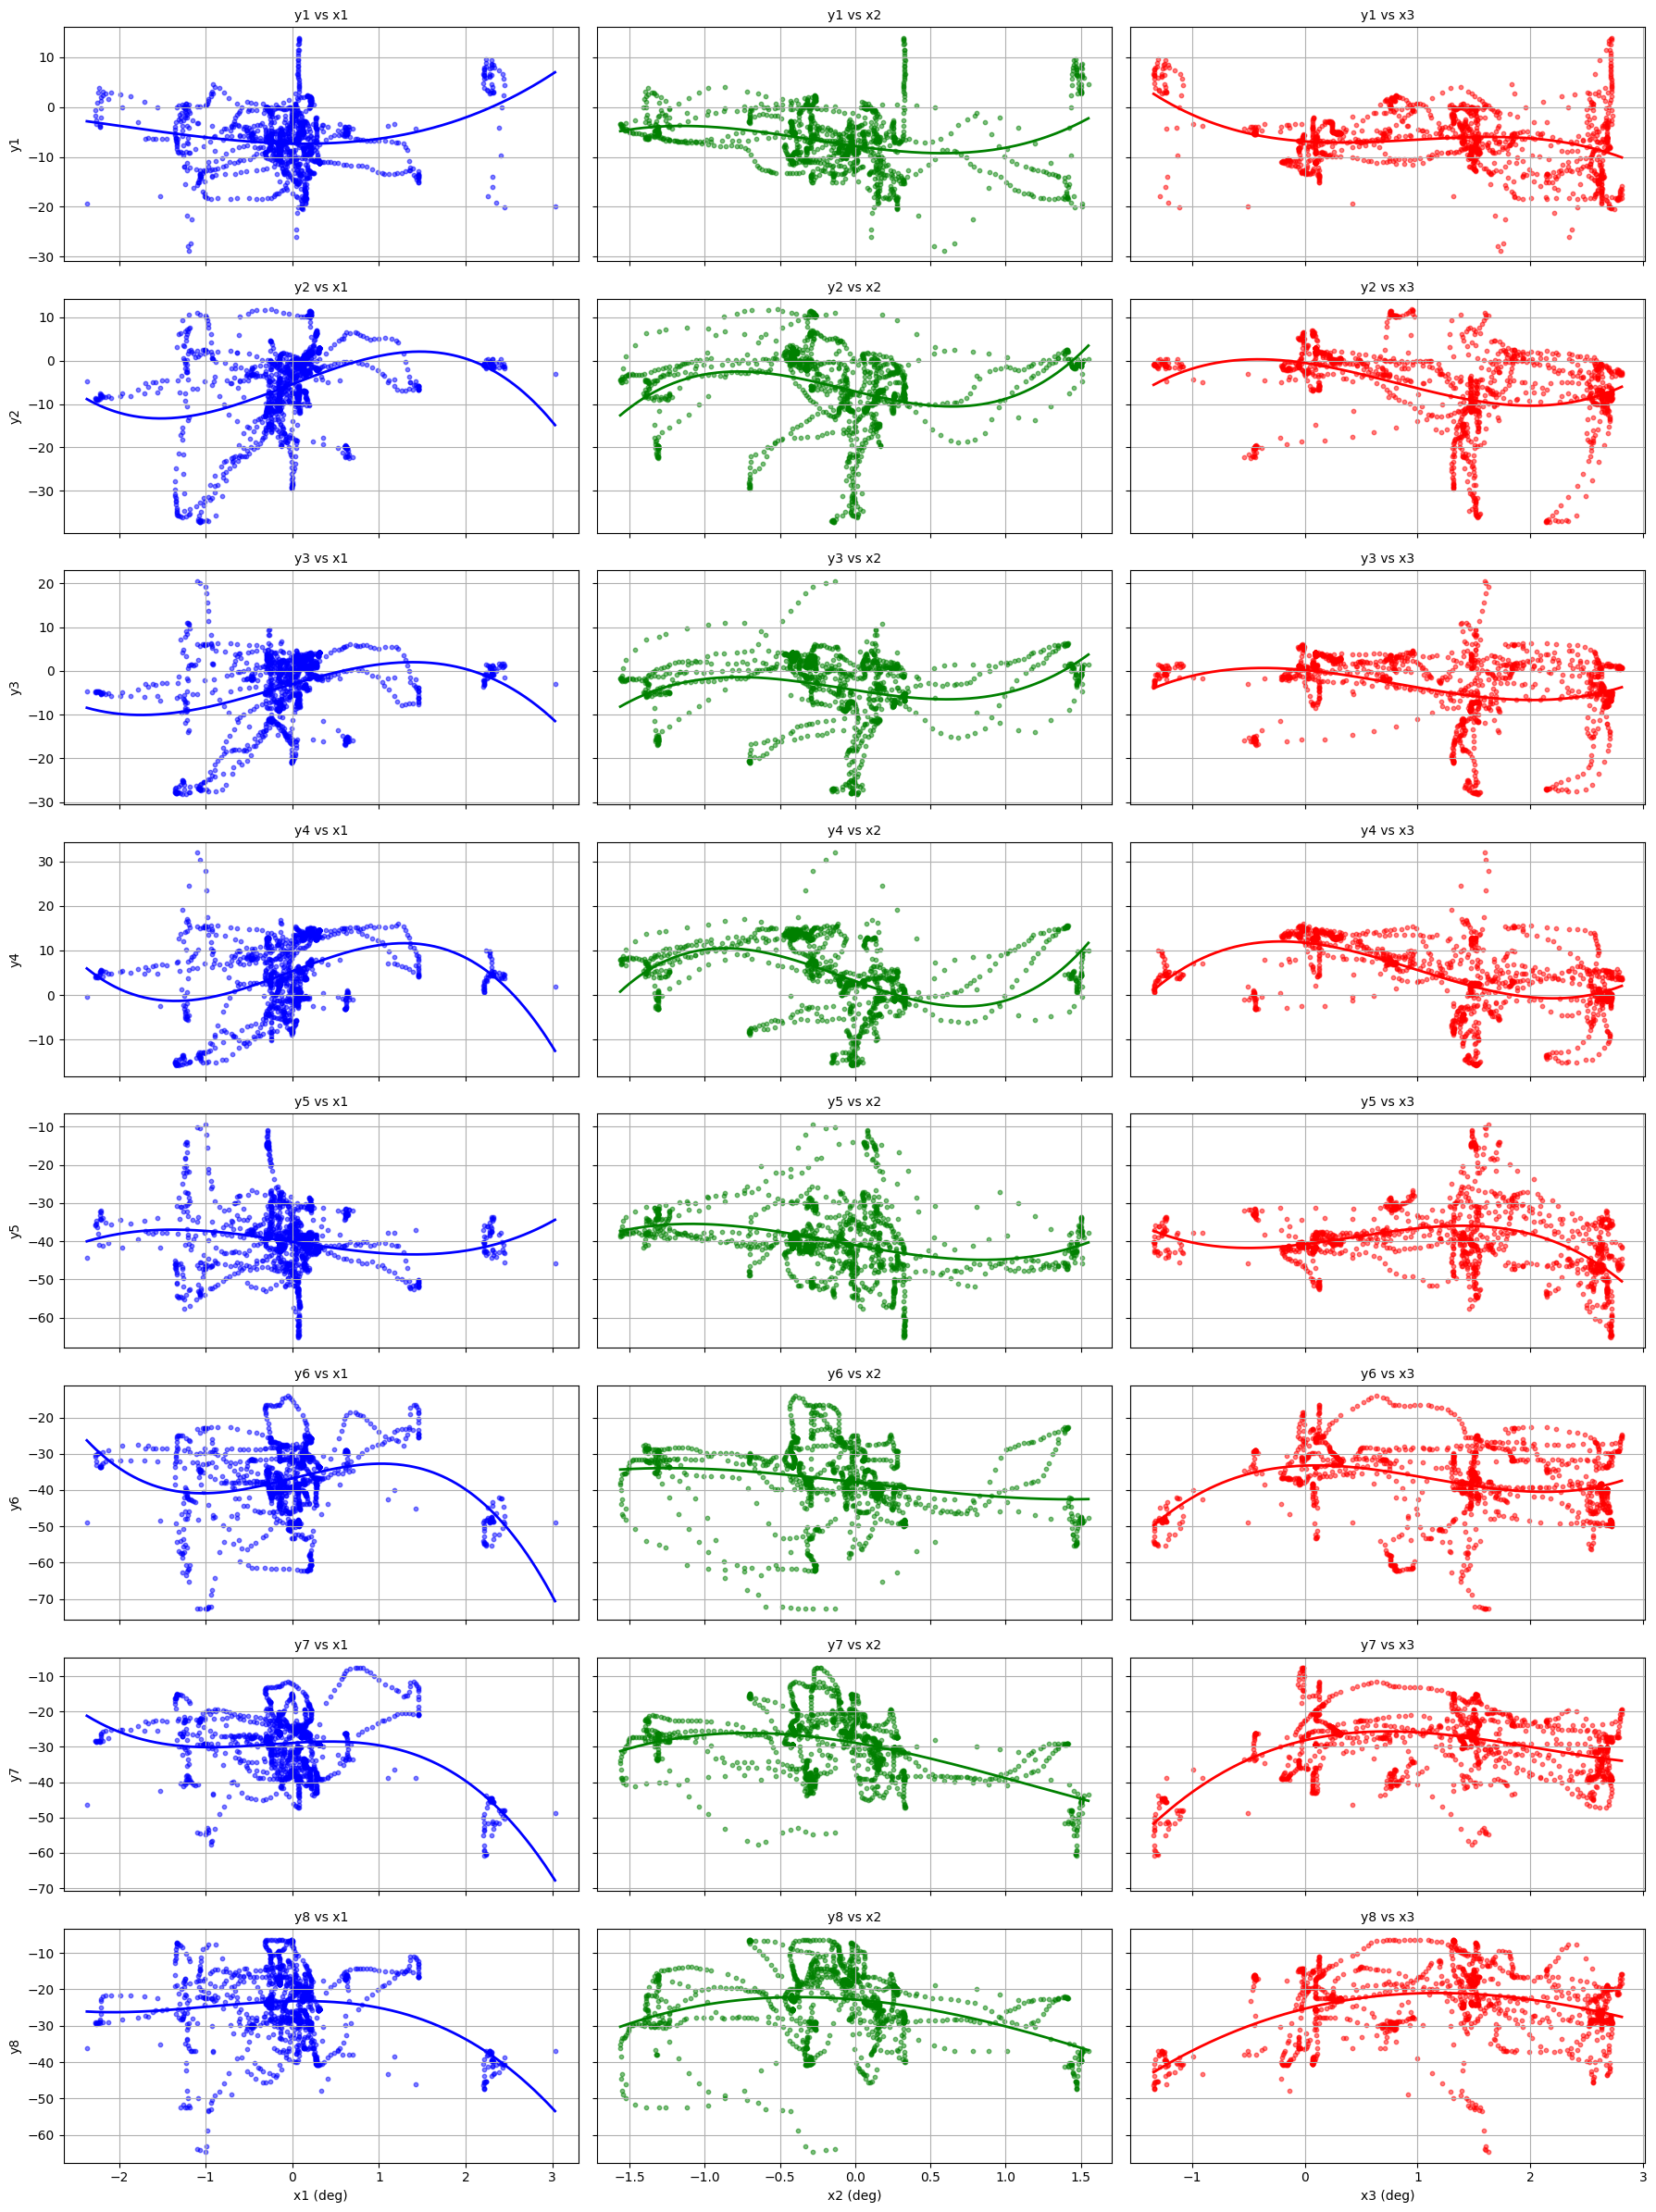

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# x 및 y 리스트 생성
x_list = [df.iloc[:, 8], df.iloc[:, 9], df.iloc[:, 10]]  # x1, x2, x3
y_list = [df.iloc[:, i] for i in range(8)]              # y1 ~ y8

def fit_and_plot_trend(ax, x, y, degree, label, color):
    coeffs = np.polyfit(x, y, degree)
    poly = np.poly1d(coeffs)

    x_sorted = np.linspace(np.min(x), np.max(x), 300)
    y_fit = poly(x_sorted)

    ax.scatter(x, y, s=10, alpha=0.5, color=color)
    ax.plot(x_sorted, y_fit, linewidth=2, color=color)
    ax.set_title(f'y{label+1} vs x{j+1}', fontsize=10)
    ax.grid(True)

# 8x3 subplot 생성
fig, axes = plt.subplots(8, 3, figsize=(18, 24), sharex='col', sharey='row')

colors = ['blue', 'green', 'red']  # x1, x2, x3에 대응하는 색

for i, y in enumerate(y_list):       # i: row index (0 to 7)
    for j, x in enumerate(x_list):   # j: col index (0 to 2)
        ax = axes[i, j]
        fit_and_plot_trend(ax, x, y, degree=3, label=i, color=colors[j])
        if i == 7:
            ax.set_xlabel(f'x{j+1} (deg)')
        if j == 0:
            ax.set_ylabel(f'y{i+1}')

plt.tight_layout()
plt.show()


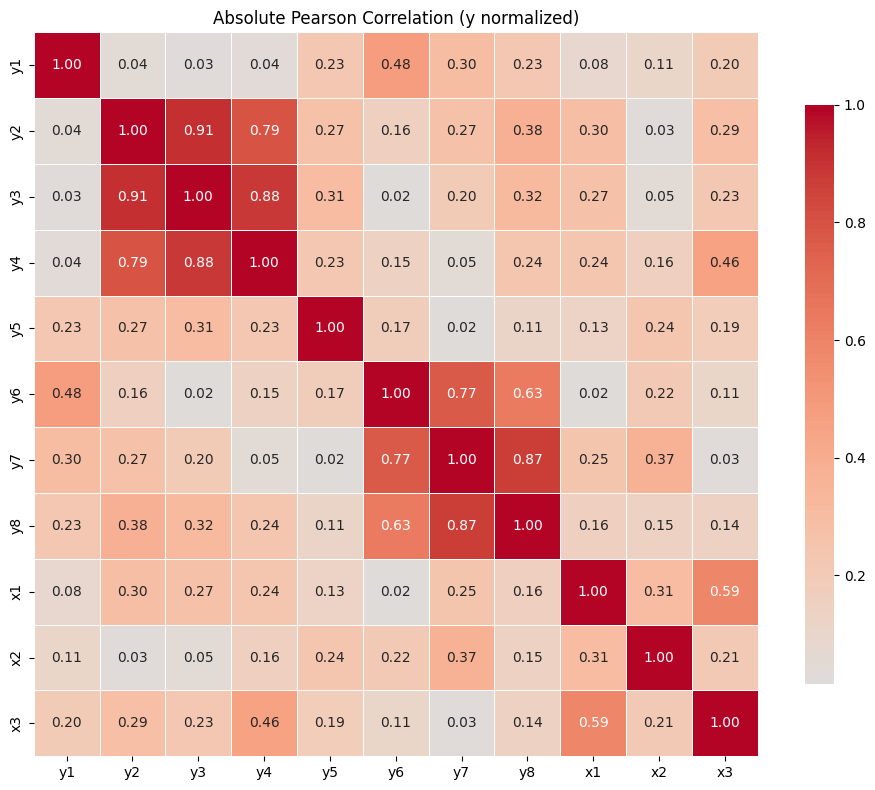

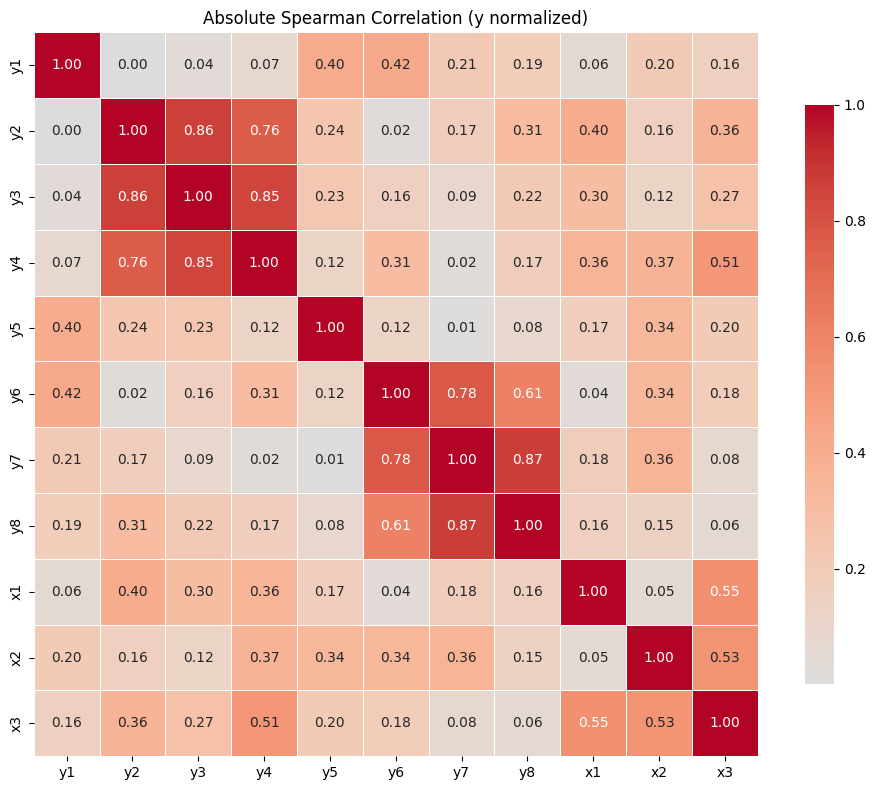

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# y1 ~ y8: 정규화
y_df = df.iloc[:, 0:8].copy()
x_df = df.iloc[:, 8:11].copy()

y_norm = (y_df - y_df.min()) / (y_df.max() - y_df.min())

# 컬럼 이름 설정
y_norm.columns = [f'y{i+1}' for i in range(8)]
x_df.columns = [f'x{j+1}' for j in range(3)]

# 결합
combined_df = pd.concat([y_norm, x_df], axis=1)

# Pearson 상관계수 (선형)
corr_pearson = combined_df.corr(method='pearson').abs()

# Spearman 상관계수 (비선형 단조)
corr_spearman = combined_df.corr(method='spearman').abs()

# ✅ Figure 1: Pearson 상관관계 heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_pearson, annot=True, fmt=".2f", cmap='coolwarm', center=0,
            linewidths=0.5, square=True, cbar_kws={"shrink": 0.8})
plt.title("Absolute Pearson Correlation (y normalized)")
plt.tight_layout()

# ✅ Figure 2: Spearman 상관관계 heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_spearman, annot=True, fmt=".2f", cmap='coolwarm', center=0,
            linewidths=0.5, square=True, cbar_kws={"shrink": 0.8})
plt.title("Absolute Spearman Correlation (y normalized)")
plt.tight_layout()

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import joblib  # 모델 저장용

# 1) 데이터 준비
x1 = df.iloc[:, 8].values
x2 = df.iloc[:, 9].values
x3 = df.iloc[:,10].values
X  = np.vstack([x1, x2, x3]).T

# 출력 y 정의
y_list = [df.iloc[:, i].values for i in range(8)]  # y1 ~ y8

# 시각화 준비
fig, axes = plt.subplots(8, 3, figsize=(18, 24), sharex='col', sharey='row')
colors = ['blue', 'green', 'red']

for i, y in enumerate(y_list):
    # 기준값 y_ref = 첫번째 샘플의 값
    y_ref = y[0]
    
    # 기준으로부터 편차 Δy 계산
    y_delta = y - y_ref

    # 편차 학습
    model = make_pipeline(
        PolynomialFeatures(degree=3, include_bias=False),
        LinearRegression()
    )
    model.fit(X, y_delta)
    
    # 예측된 편차
    y_pred_delta = model.predict(X)
    
    # 보정된 y
    y_corrected = y - y_pred_delta

    # 시각화
    for j, x in enumerate([x1, x2, x3]):
        ax = axes[i, j]
        ax.scatter(x, y_corrected, s=10, alpha=0.6, color=colors[j])
        ax.hlines(y_ref, np.min(x), np.max(x), linestyle='--', color='black', linewidth=1)

        if i == 7:
            ax.set_xlabel(f'$x_{{{j+1}}}$')
        if j == 0:
            ax.set_ylabel(f'$y_{{{i+1}}}$')
        ax.set_title(f'$y_{{{i+1}}}$ vs $x_{{{j+1}}}$ (corrected)', fontsize=10)
        ax.grid(True)

plt.tight_layout()
plt.show()

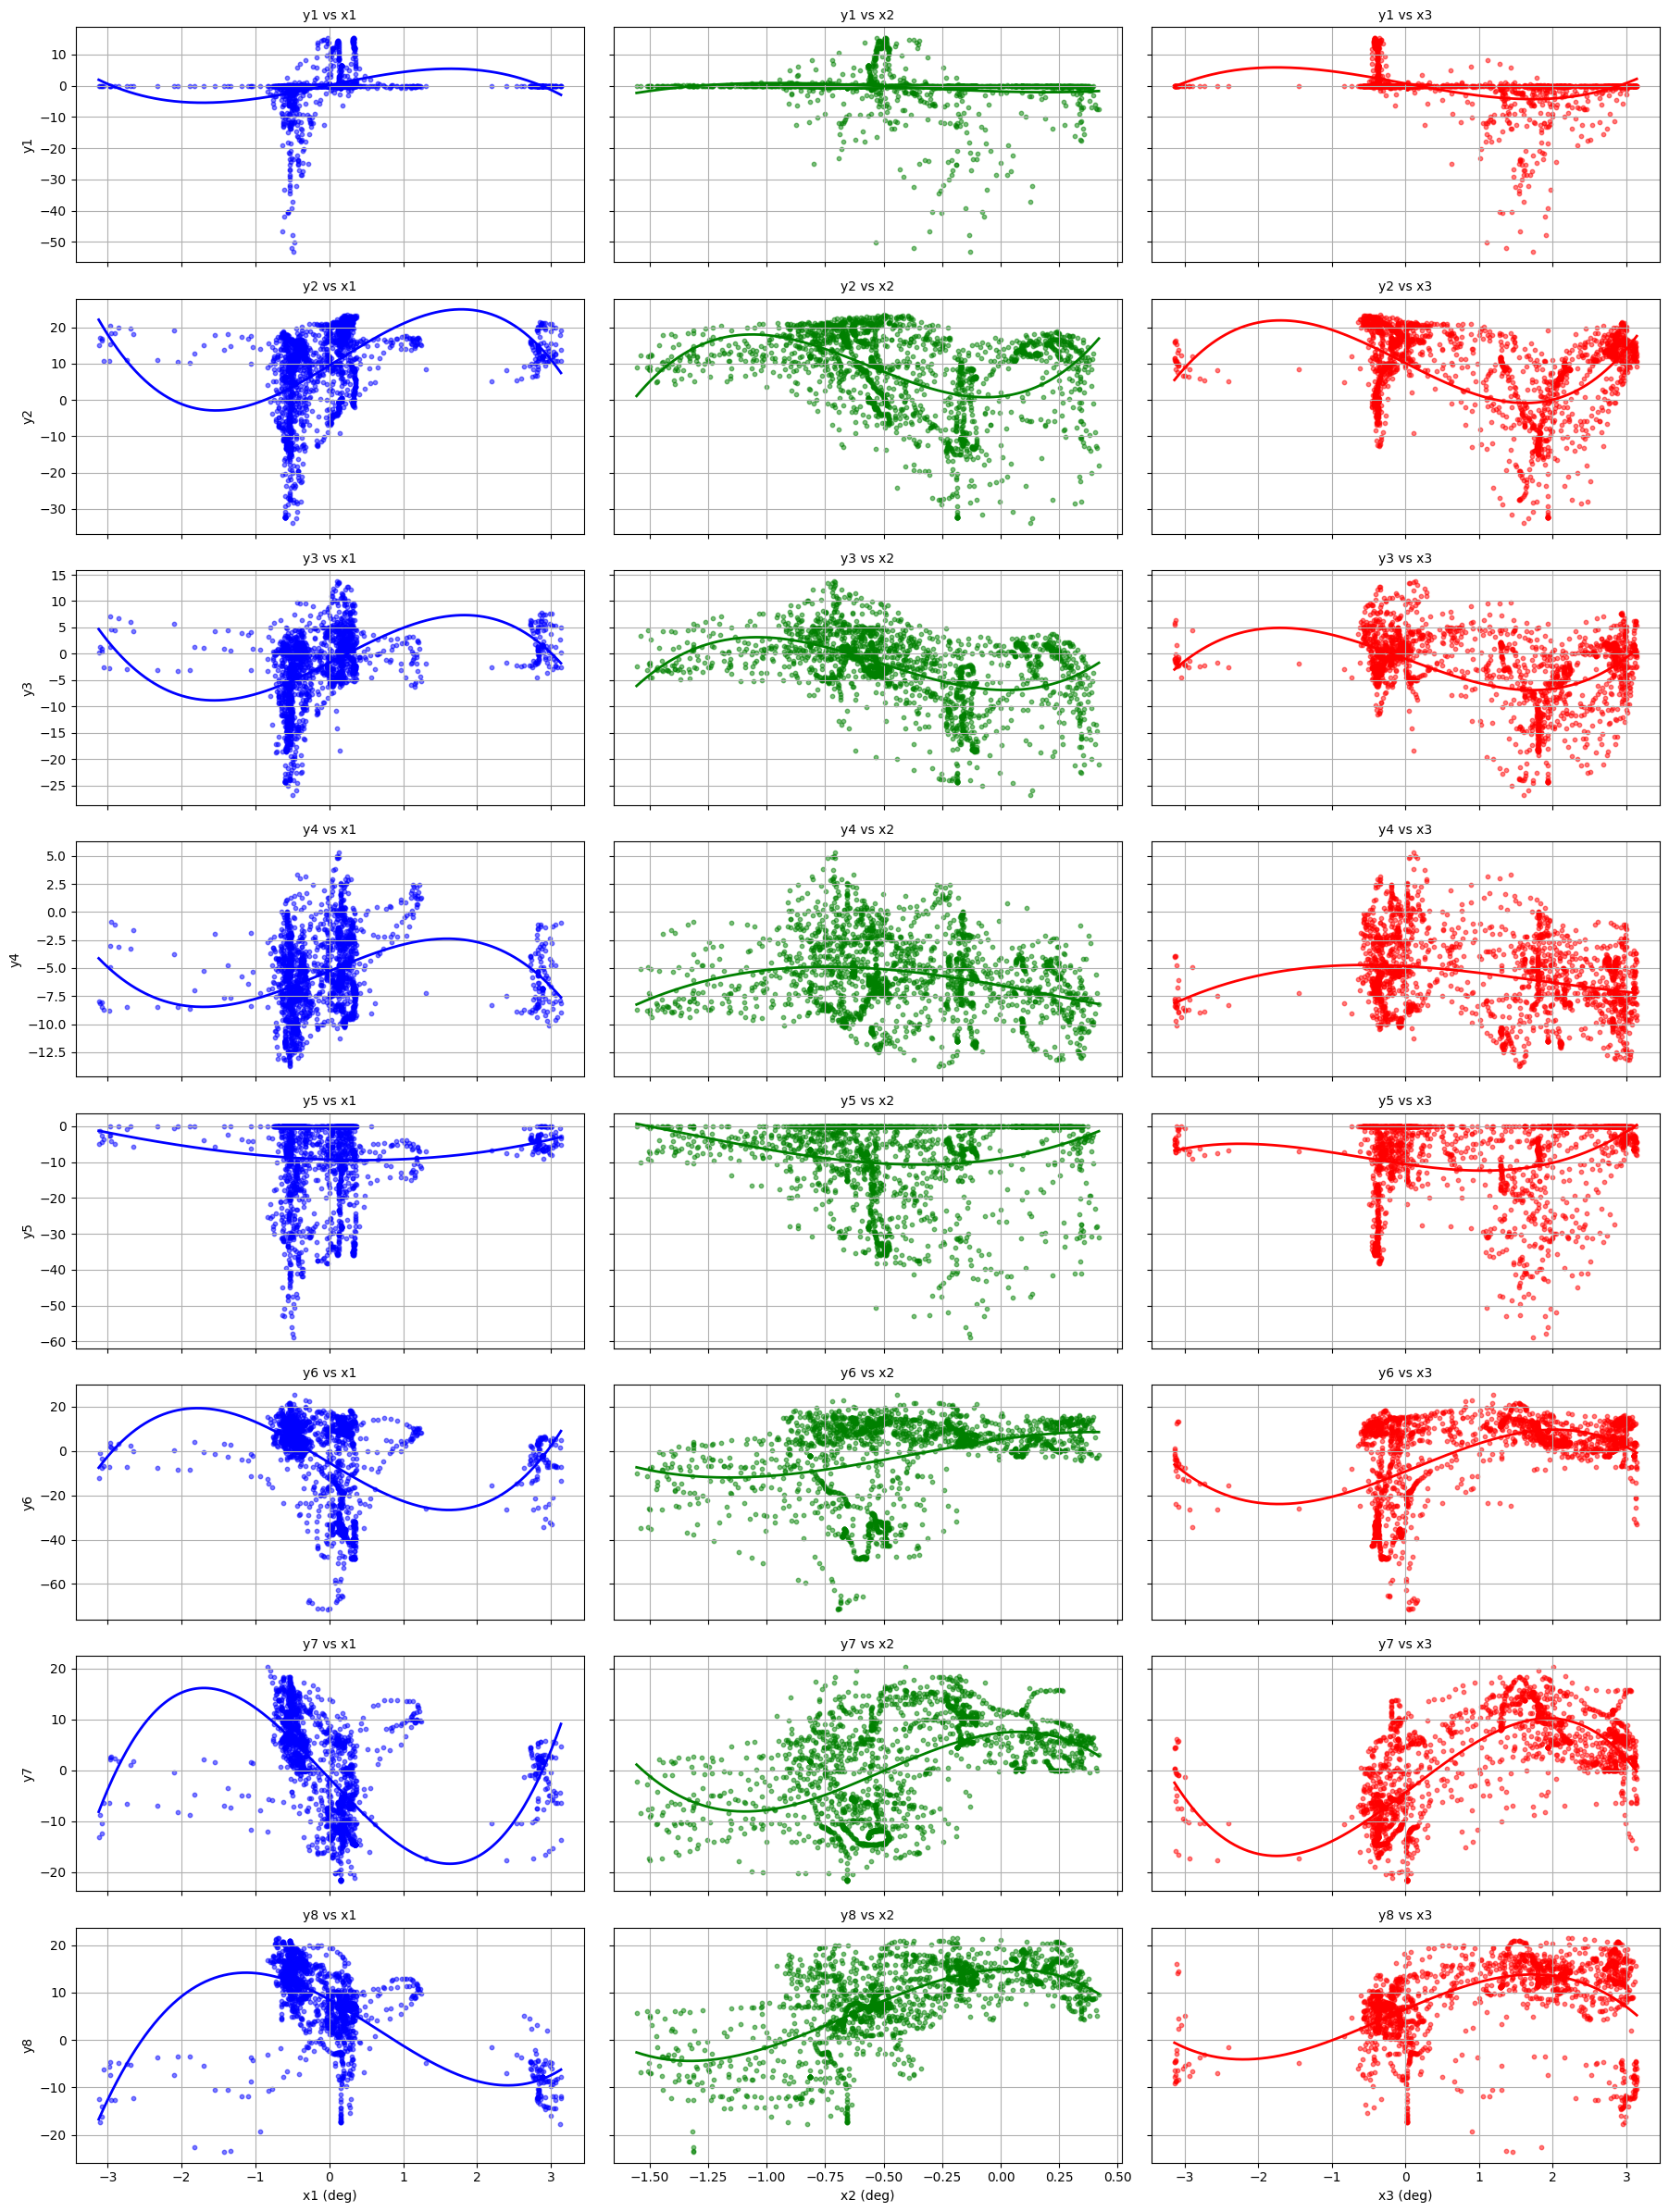

In [65]:
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/dyros/Desktop/dummy_ws/data/extend.csv')

# Display the first few rows of the DataFrame
df = df.dropna().reset_index(drop=True)

df = df.iloc[:,-12:-1]

# x 및 y 리스트 생성
x_list = [df.iloc[:, 8], df.iloc[:, 9], df.iloc[:, 10]]  # x1, x2, x3
y_list = [df.iloc[:, i] for i in range(8)]              # y1 ~ y8

def fit_and_plot_trend(ax, x, y, degree, label, color):
    coeffs = np.polyfit(x, y, degree)
    poly = np.poly1d(coeffs)

    x_sorted = np.linspace(np.min(x), np.max(x), 300)
    y_fit = poly(x_sorted)

    ax.scatter(x, y, s=10, alpha=0.5, color=color)
    ax.plot(x_sorted, y_fit, linewidth=2, color=color)
    ax.set_title(f'y{label+1} vs x{j+1}', fontsize=10)
    ax.grid(True)

# 8x3 subplot 생성
fig, axes = plt.subplots(8, 3, figsize=(18, 24), sharex='col', sharey='row')

colors = ['blue', 'green', 'red']  # x1, x2, x3에 대응하는 색

for i, y in enumerate(y_list):       # i: row index (0 to 7)
    for j, x in enumerate(x_list):   # j: col index (0 to 2)
        ax = axes[i, j]
        fit_and_plot_trend(ax, x, y, degree=3, label=i, color=colors[j])
        if i == 7:
            ax.set_xlabel(f'x{j+1} (deg)')
        if j == 0:
            ax.set_ylabel(f'y{i+1}')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import joblib

# 1) 데이터 불러오기
df = pd.read_csv('C:/Users/dyros/Desktop/dummy_ws/data/extend.csv')
df = df.dropna().reset_index(drop=True)
df = df.iloc[:, -12:-1]  # y1~y8 + x1,x2,x3 추출

# 2) 입력 및 출력 정의
x1 = df.iloc[:, 8].values
x2 = df.iloc[:, 9].values
x3 = df.iloc[:,10].values
X_new = np.vstack([x1, x2, x3]).T  # shape (N, 3)

y_list = [df.iloc[:, i].values for i in range(8)]  # y1 ~ y8

# 3) 저장된 모델 불러오기
bias_models = joblib.load('bias_models_poly3_y1_to_y8.pkl')

# 4) 8x3 subplot 생성
fig, axes = plt.subplots(8, 3, figsize=(18, 24), sharex='col', sharey='row')
colors = ['blue', 'green', 'red']

# 5) 보정 후 시각화
for i, y in enumerate(y_list):  # i: row index
    model = bias_models[i]
    y_bias      = model.predict(X_new)
    y_corrected = y - y_bias

    for j, x in enumerate([x1, x2, x3]):  # j: col index
        ax = axes[i, j]
        ax.scatter(x, y_corrected, s=10, alpha=0.5, color=colors[j])
        ax.hlines(0, np.min(x), np.max(x), linestyle='--', linewidth=1, color='black')

        ax.set_title(f'$y_{{{i+1}}}$ vs $x_{{{j+1}}}$ (bias removed)', fontsize=10)
        ax.grid(True)
        if i == 7:
            ax.set_xlabel(f'$x_{{{j+1}}}$ (deg)')
        if j == 0:
            ax.set_ylabel(f'$y_{{{i+1}}}$')

plt.tight_layout()
plt.show()


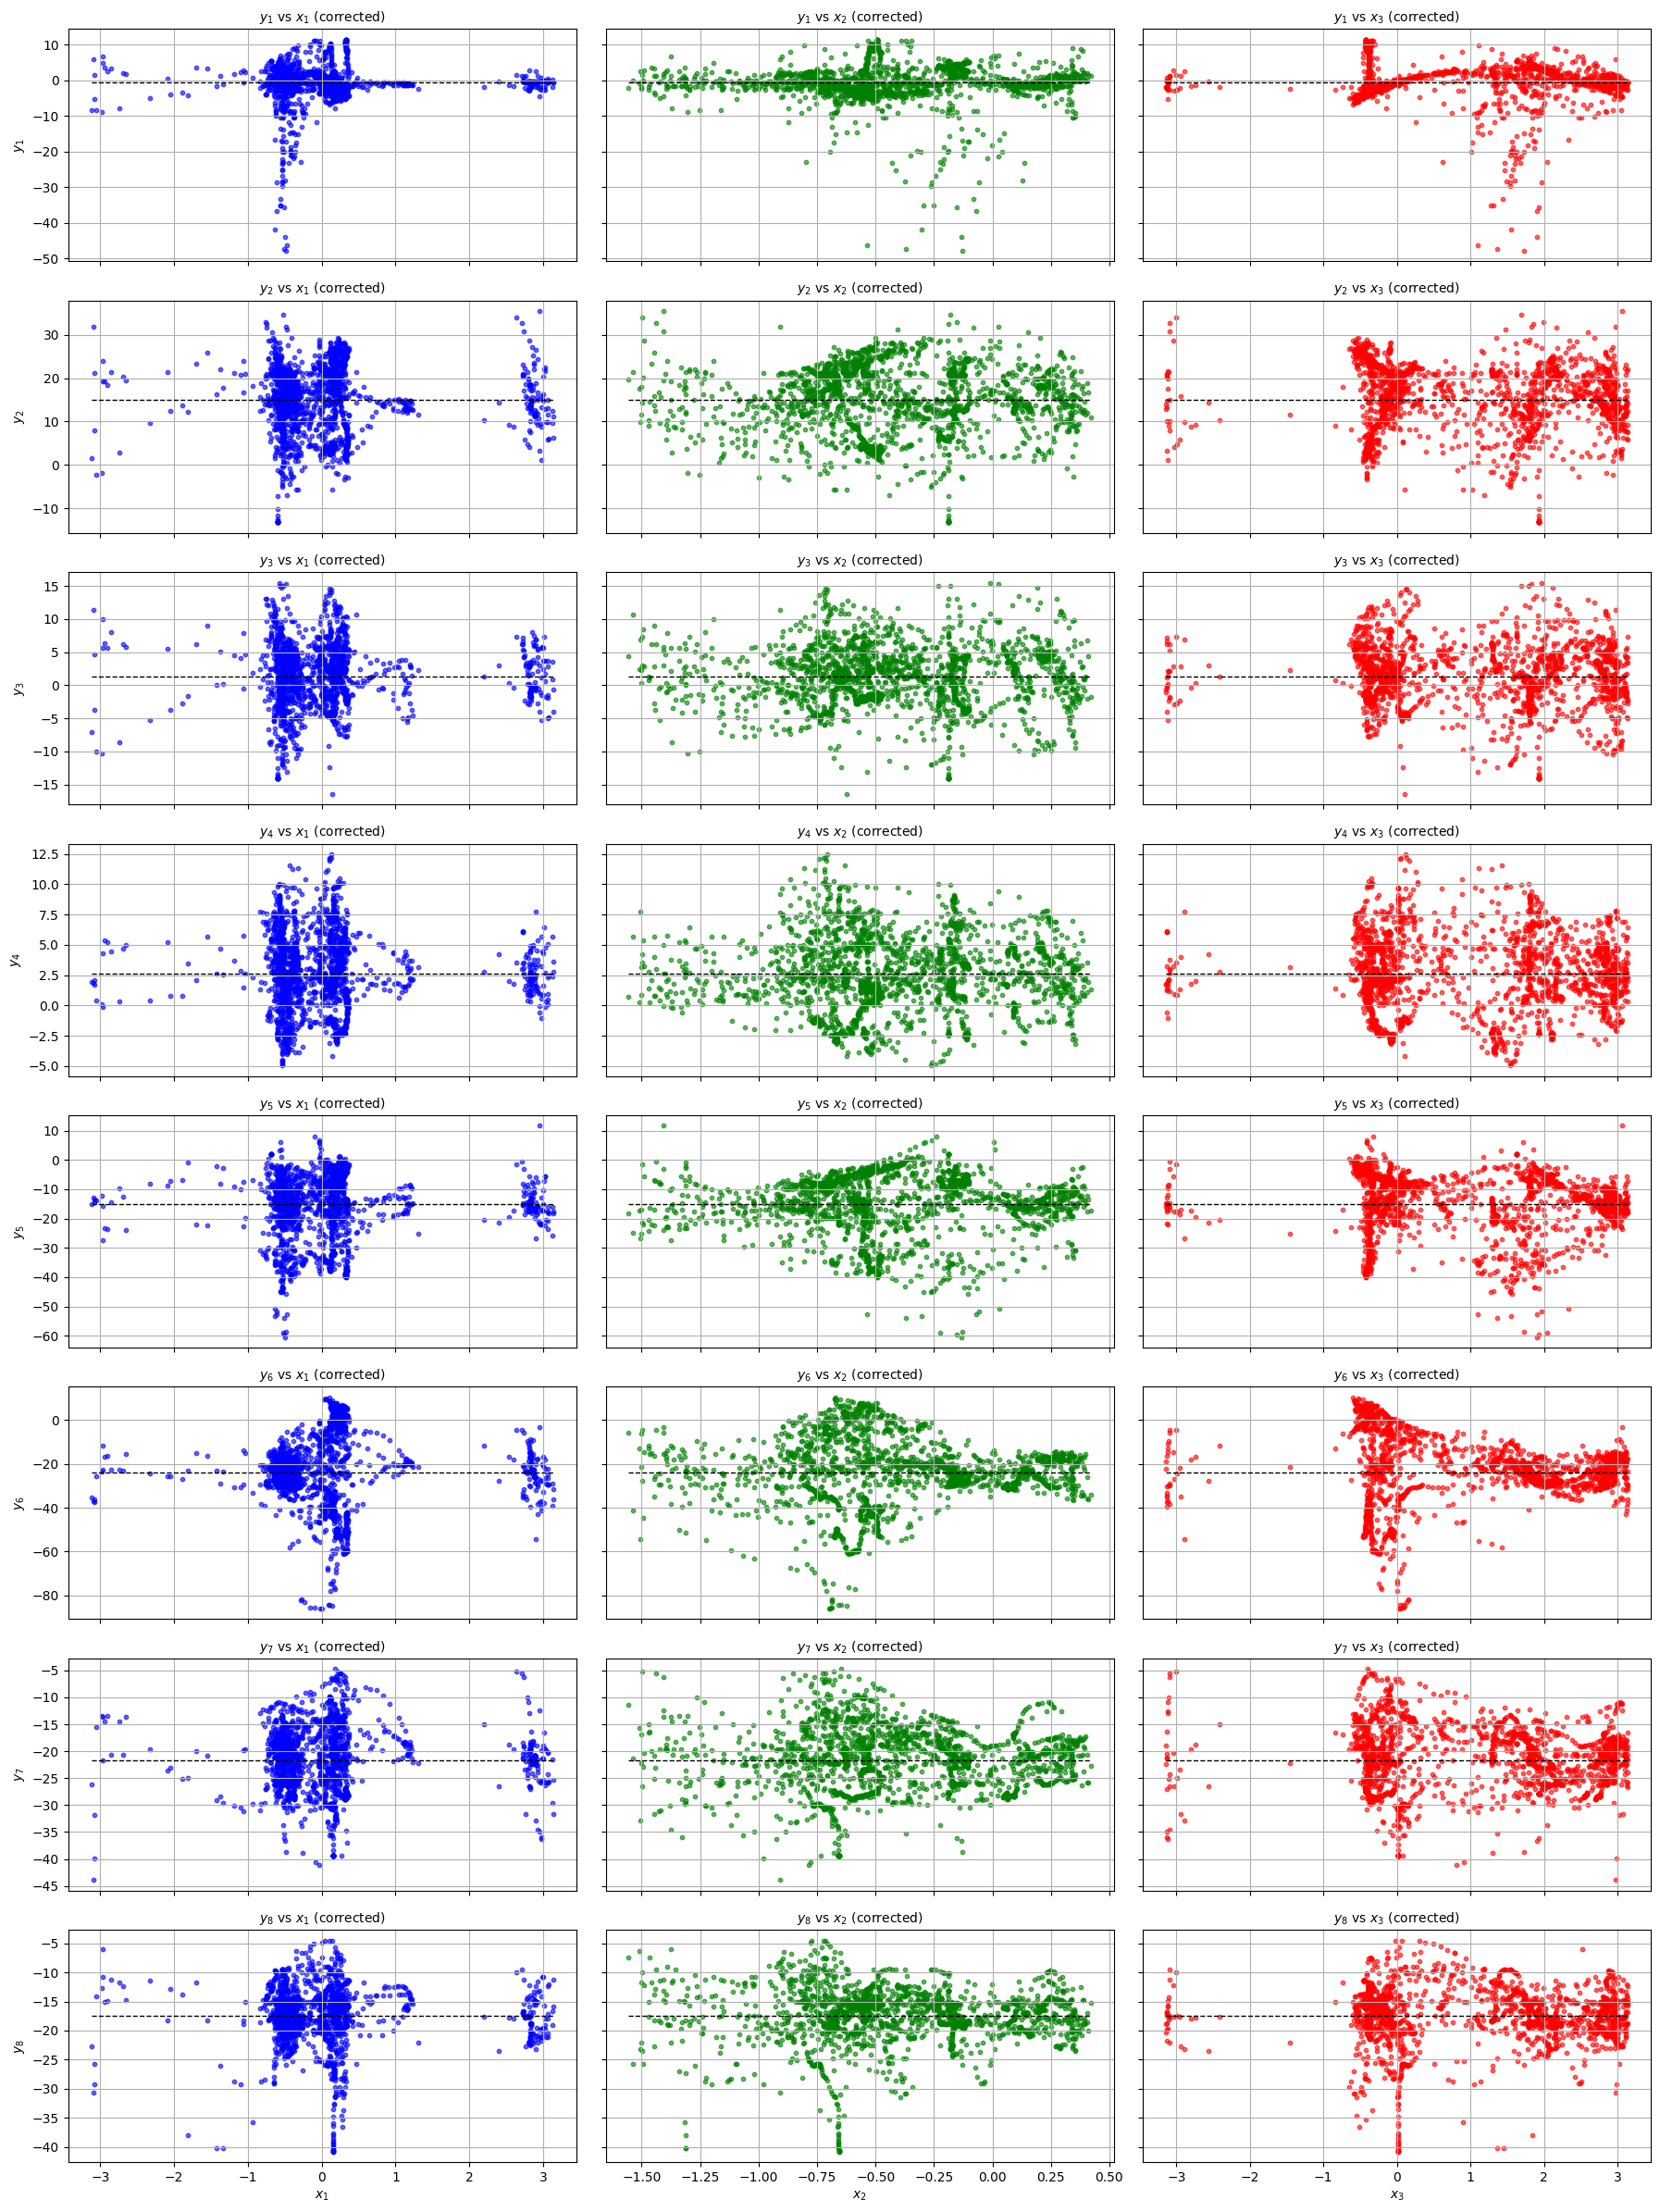

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

x1 = df.iloc[:, 8].values
x2 = df.iloc[:, 9].values
x3 = df.iloc[:,10].values
X  = np.vstack([x1, x2, x3]).T

# 출력 y 정의
y_list = [df.iloc[:, i].values for i in range(8)]  # y1 ~ y8

# 시각화 준비
fig, axes = plt.subplots(8, 3, figsize=(18, 24), sharex='col', sharey='row')
colors = ['blue', 'green', 'red']

for i, y in enumerate(y_list):
    # 기준값 y_ref = 첫번째 샘플의 값
    y_ref = y[0]
    
    # 기준으로부터 편차 Δy 계산
    y_delta = y - y_ref

    # 편차 학습
    model = make_pipeline(
        PolynomialFeatures(degree=3, include_bias=False),
        LinearRegression()
    )
    model.fit(X, y_delta)
    
    # 예측된 편차
    y_pred_delta = model.predict(X)
    
    # 보정된 y
    y_corrected = y - y_pred_delta

    # 시각화
    for j, x in enumerate([x1, x2, x3]):
        ax = axes[i, j]
        ax.scatter(x, y_corrected, s=10, alpha=0.6, color=colors[j])
        ax.hlines(y_ref, np.min(x), np.max(x), linestyle='--', color='black', linewidth=1)

        if i == 7:
            ax.set_xlabel(f'$x_{{{j+1}}}$')
        if j == 0:
            ax.set_ylabel(f'$y_{{{i+1}}}$')
        ax.set_title(f'$y_{{{i+1}}}$ vs $x_{{{j+1}}}$ (corrected)', fontsize=10)
        ax.grid(True)

plt.tight_layout()
plt.show()